## Question

Q5) Perform Sentiment Analysis in the network graph using RNN

C:\Users\niraj_1kwckht\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\niraj_1kwckht\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\niraj_1kwckht\anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5750 - loss: 0.6923
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5500 - loss: 0.6881
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7375 - loss: 0.6712
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5500 - loss: 0.6691
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7375 - loss: 0.6500


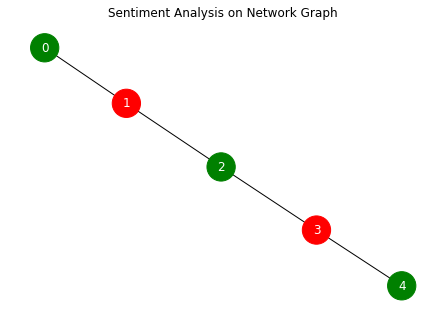

In [2]:

import numpy as np
# Sample data (replace this with your actual dataset)
texts = [
    "I love this product!",
    "This is terrible and I hate it.",
    "Absolutely amazing experience.",
    "Not good, very disappointing.",
    "I'm so happy with the service."
]


labels = np.array([1, 0, 1, 0, 1])

# Tokenize and preprocess

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=10)

# Build the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=10))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, labels, epochs=5, batch_size=2)

import networkx as nx
import matplotlib.pyplot as plt


# Define a simple graph
edge_list = [(0, 1), (1, 2), (2, 3), (3, 4)]

G = nx.Graph()
G.add_edges_from(edge_list)



#real_predictions = model.predict(X)
#real_labels = (real_predictions > 0.5).astype(int).flatten())



# Fake predictions from your model (replace with actual model.predict if needed)
fake_predictions = np.array([1, 0, 1, 0, 1])  # 1 = positive, 0 = negative

# Assign sentiment to nodes
for i, node in enumerate(G.nodes()):
    G.nodes[node]['sentiment'] = fake_predictions[i]

# Color node based on sentiment
colors = ['green' if G.nodes[n]['sentiment'] == 1 else 'red' for n in G.nodes()]

nx.draw(G, with_labels=True, node_color=colors, node_size=800, font_color='white')
plt.title("Sentiment Analysis on Network Graph")
plt.show()